In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:
##Simulated hospital dataset

In [4]:
data = {
    'Patient_ID': range(1, 101),
    'Age': np.random.randint(18, 90, 100),
    'Gender': np.random.choice(['Male', 'Female'], 100),
    'Blood_Pressure': np.random.randint(90, 180, 100),
    'Heart_Rate': np.random.randint(60, 120, 100),
    'Diagnosis': np.random.choice(['Hypertension', 'Diabetes', 'Cardiac Arrest', 'Healthy'], 100),
    'Treatment': np.random.choice(['Medication', 'Surgery', 'Therapy', 'None'], 100),
    'Hospital_Stay_Days': np.random.randint(1, 30, 100),
    'Outcome': np.random.choice(['Recovered', 'Not Recovered'], 100)
}





In [5]:
df = pd.DataFrame(data)

In [6]:
print(df)

    Patient_ID  Age  Gender  Blood_Pressure  Heart_Rate     Diagnosis  \
0            1   79    Male             158          79       Healthy   
1            2   20  Female             138          63       Healthy   
2            3   52  Female             128         100  Hypertension   
3            4   63    Male             135          87       Healthy   
4            5   42    Male              91          62       Healthy   
..         ...  ...     ...             ...         ...           ...   
95          96   25  Female             102          60       Healthy   
96          97   56    Male             166          75      Diabetes   
97          98   51    Male             102          70  Hypertension   
98          99   21  Female             170          85       Healthy   
99         100   40  Female             176          96  Hypertension   

     Treatment  Hospital_Stay_Days        Outcome  
0      Therapy                   4      Recovered  
1   Medication     

In [7]:
# Data Cleaning

In [8]:
df.drop_duplicates(inplace=True)  # Removing duplicates

In [9]:
def clean_age(age):
    return np.nan if age < 0 else age


In [10]:
df['Age'] = df['Age'].apply(clean_age)
df.dropna(inplace=True)


In [11]:
print(df)

    Patient_ID  Age  Gender  Blood_Pressure  Heart_Rate     Diagnosis  \
0            1   79    Male             158          79       Healthy   
1            2   20  Female             138          63       Healthy   
2            3   52  Female             128         100  Hypertension   
3            4   63    Male             135          87       Healthy   
4            5   42    Male              91          62       Healthy   
..         ...  ...     ...             ...         ...           ...   
95          96   25  Female             102          60       Healthy   
96          97   56    Male             166          75      Diabetes   
97          98   51    Male             102          70  Hypertension   
98          99   21  Female             170          85       Healthy   
99         100   40  Female             176          96  Hypertension   

     Treatment  Hospital_Stay_Days        Outcome  
0      Therapy                   4      Recovered  
1   Medication     

In [12]:
# EDA & Visualization

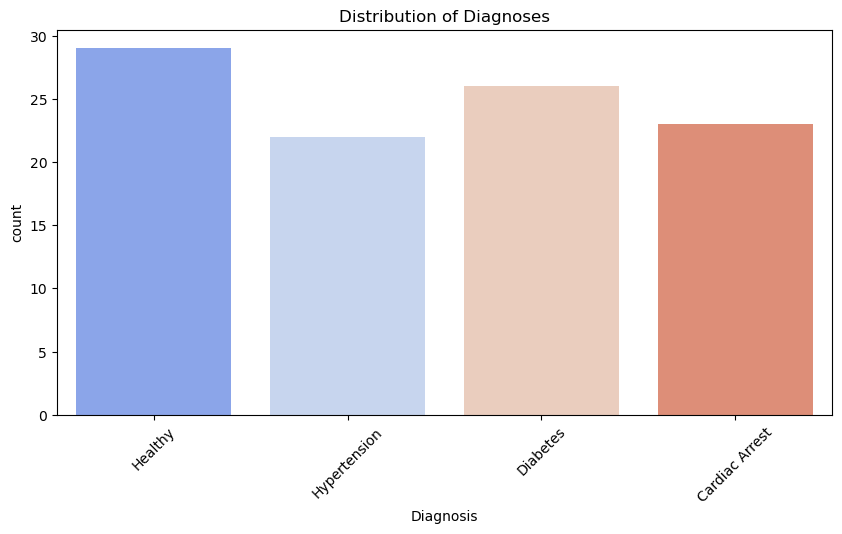

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Diagnosis', data=df, palette='coolwarm')
plt.title('Distribution of Diagnoses')
plt.xticks(rotation=45)
plt.show()


In [14]:
# Machine Learning: Predicting Recovery

In [15]:
X = df[['Age', 'Blood_Pressure', 'Heart_Rate', 'Hospital_Stay_Days']]

In [16]:
y = df['Outcome'].map({'Recovered': 1, 'Not Recovered': 0})

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)



In [20]:
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
